# Linear Regression with Statsmodels for Movie Revenue

- xx/xx/xx

## Activity: Create a Linear Regression Model with Statsmodels for Revenue

- Today we will be working with JUST the data data from the TMDB API for years 2000-2021. 
    - We will prepare the data for modeling
        - Some feature engineering
        - Our usual Preprocessing
        - New steps for statsmodels!
    - We will fit a statsmodels linear regression.
    - We Will inspect the model summary.
    - We will create the visualizations to check assumptions about the residuals.



- Next class we will continue this activity.
    - We will better check all 4 assumptions.
    - We will discuss tactics for dealing with violations of the assumptions. 
    - We will use our coefficients to make stakeholder recommendations.

### Concepts Demonstrated

- [ ] Using `glob` for loading in all final files. 
- [ ] Statsmodels OLS
- [ ] QQ-Plot
- [ ] Residual Plot

# Loading the Data

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

In [2]:
pd.set_option('display.max_columns',100)

### 📚 Finding & Loading Batches of Files with `glob`

- Now we would do that in a loop, and only want to open .csv.gz.
- But there is a better way!
>- Introducing `glob`
    - Glob takes a filepath/query and will find every filename that matches the pattern provided.
    - We use asterisks as wildcards in our query.
    


In [3]:
import glob
## Make a filepath query
q = 'Data/**/final*.csv.gz'
file_list = glob.glob(q, recursive = True)
file_list

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2010.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2011.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2012.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2013.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2014.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2015.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2016.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2017.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2018.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2019.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2020.csv.gz',
 'Data\\2010-2021\\final_tmdb_data_2021.csv.gz']

In [4]:
# Use glob.glob to get COMPLETE filepaths


> But where are the rest of the years?

In [5]:
## in a sub-folder


- Recursive Searching with glob.
    - add a `**/` in the middle of your query to grab any matches from all subfolders. 

In [6]:
# Use glob.glob to get COMPLETE filepaths



In [7]:
# ## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(file, lineterminator = '\n') for file in file_list])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
3531,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,"Ex-con turned ""scrapper"" Jake leads a quiet li...",3.416,/ydnOAvlBzdqMyBRBXyQpReSzxrH.jpg,"[{'id': 91999, 'logo_path': None, 'name': 'Luc..

- Dealing with ParserErrors with "possibly malformed files"

    - for a reason I do not fully understand yet, some of the files I downloaded error if I try to read them.
        - "ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.`
    - After some googling, the fix was to add `lineterminator='\n'` to pd.read_csv


In [8]:
# remove ids that are 0  and then reset index
df = df.loc[df['imdb_id']!="0"]
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.889,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'..

In [9]:
## saving the combined csv to disk
df.to_csv('Data/combined_dmdb_data.csv.gz', compression='gzip', index = False)


# Preprocessing

In [10]:
drop_cols = ['backdrop_path', 'original_title', 'overview', 'poster_path', 'status', 'tagline', 'id', 'homepage', 'production_companies', 'production_countries', 'video', 'spoken_languages', 'original_language']
df = df.drop(columns=drop_cols)

## Feature Engineering


- belongs to collection: convert to boolean
- Genres: get just name and manually OHE
- Cleaning Categories in Certification
- Converting release date to year, month, and day.

### belongs to collection

In [11]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

3738

In [12]:
df['belongs_to_collection']=df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56392
True      3738
Name: belongs_to_collection, dtype: int64

### genre

In [13]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [14]:
## Use our function and exploding the new column
#get_genre_name(df.loc[3,'genres'])

# use get_genre_name and convert all the genere name in list
df['genre_list']= df['genres'].apply(get_genre_name)
df_explode = df.explode('genre_list')
df_explode


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genre_list
1,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,Comedy
1,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,Music
1,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,Romance
2,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN,Science Fiction
3,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,tt9900940,0.0,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.416,2021-12-07,0.0,87.0,The Scrapper,6.0,2.0,NaN,Drama
3531,tt9900940,0.0,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.416,2021-12-07,0.0,87.0,The Scrapper,6.0,2.0,NaN,Thriller
3532,tt9907782,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",22.184,2021-07-28,4588389.0,111.0,The Cursed,7.0,55.0,R,Horror
3532,tt9907782,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",22.184,2021-07-28,4588389.0,111.0,The Cursed,7.0,55.0,R,Fantasy


In [15]:
## save unique genres

unique_genres = df_explode['genre_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [16]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genre_list,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,"[Comedy, Music, Romance]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN,[Science Fiction],False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN,"[Drama, Action, Crime]",False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22.411,2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,"[Drama, Romance]",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.889,2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R,[Drama],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0.840,2021-09-08,0.0,118.0,Heiko's World,0.0,0.0,NaN,"[Drama, Comedy]",True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3529,tt9896876,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.665,2021-11-19,0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13,"[Comedy, Drama, Romance]",True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3530,tt9898844,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}]",421.143,2022-01-21,0.0,91.0,The Hunting,4.9,20.0,NaN,[Horror],False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3531,tt9900940,0.0,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.416,2021-12-07,0.0,87.0,The Scrapper,6.0,2.0,NaN,"[Crime, Drama, Thriller]",False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [17]:
## Drop original genre cols
df  = df.drop(columns=['genres','genre_list'])
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1,tt0113026,0.0,False,10000000.0,2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0113092,0.0,False,0.0,1.974,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0116391,0.0,False,0.0,1.341,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118694,0.0,False,150000.0,22.411,2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,tt0118852,0.0,False,0.0,4.889,2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,False,0.0,0.840,2021-09-08,0.0,118.0,Heiko's World,0.0,0.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3529,tt9896876,0.0,False,0.0,3.665,2021-11-19,0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3530,tt9898844,0.0,False,0.0,421.143,2022-01-21,0.0,91.0,The Hunting,4.9,20.0,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3531,tt9900940,0.0,False,0.0,3.416,2021-12-07,0.0,87.0,The Scrapper,6.0,2.0,NaN,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False


### certification

In [18]:
## Checking Certification values counts
df['certification'].value_counts()

R                                  6097
NR                                 3261
PG-13                              3224
PG                                 1432
G                                   442
NC-17                               156
Unrated                               5
-                                     1
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

In [19]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

NaN                                45506
R                                   6098
NR                                  3261
PG-13                               3225
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
10                                     1
Name: certification, dtype: int64

In [20]:
## fix certification col
repl_cert = {'UR': 'NR',
            'Not Rated': 'NR',
           'Unrated': 'NR',
            '-':'NR',
            '10': np.nan,
            'ScreamFest Horror Film Festival' : 'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts()


R        6098
NR       3270
PG-13    3225
PG       1432
G         442
NC-17     156
Name: certification, dtype: int64

### Converting year to sep features

In [21]:
df.loc[1, 'release_date']

1    2000-09-22
1    2001-12-25
1    2002-06-01
1    2003-02-11
1    2004-01-01
1    2005-04-22
1    1997-01-01
1    2007-10-23
1           NaN
1    1996-07-04
1    2012-12-02
1    2011-11-27
1    2012-06-15
1    2013-08-11
1    2003-07-23
1    1994-01-01
1    2016-10-28
1    2017-08-10
1    2018-11-02
1    2019-10-31
1    2020-02-21
1    1999-01-01
Name: release_date, dtype: object

In [22]:
## split release date into 3 columns
new_cols = ['year', 'month', 'day']
df[new_cols]=df['release_date'].str.split('-', expand=True)
df[new_cols] = df[new_cols].astype(float)
df

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
1,tt0113026,0.0,False,10000000.0,2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
2,tt0113092,0.0,False,0.0,1.974,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
3,tt0116391,0.0,False,0.0,1.341,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
4,tt0118694,0.0,False,150000.0,22.411,2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
5,tt0118852,0.0,False,0.0,4.889,2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,False,0.0,0.840,2021-09-08,0.0,118.0,Heiko's World,0.0,0.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021.0,9.0,8.0
3529,tt9896876,0.0,False,0.0,3.665,2021-11-19,0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021.0,11.0,19.0
3530,tt9898844,0.0,False,0.0,421.143,2022-01-21,0.0,91.0,The Hunting,4.9,20.0,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2022.0,1.0,21.0
3531,tt9900940,0.0,False,0.0,3.416,2021-12-07,0.0,87.0,The Scrapper,6.0,2.0,NaN,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,2021.0,12.0,7.0


In [23]:
## drop original feature
df = df.drop(columns=['release_date'])

## Train Test Split

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60130 entries, 1 to 3532
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   belongs_to_collection  60130 non-null  bool   
 3   budget                 60130 non-null  float64
 4   popularity             60130 non-null  float64
 5   revenue                60130 non-null  float64
 6   runtime                59298 non-null  float64
 7   title                  60130 non-null  object 
 8   vote_average           60130 non-null  float64
 9   vote_count             60130 non-null  float64
 10  certification          14623 non-null  object 
 11  Genre_Comedy           60130 non-null  bool   
 12  Genre_Music            60130 non-null  bool   
 13  Genre_Romance          60130 non-null  bool   
 14  Genre_Science Fiction  60130 non-null  bool   
 15  Gen

In [25]:
## Make x and y variables
drop_for_model = ['title','imdb_id']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
1563,0.0,False,0.0,0.600,76.0,0.0,0.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN
515,0.0,False,0.0,1.400,79.0,5.8,5.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,8.0,12.0
2342,0.0,False,0.0,2.806,137.0,7.3,24.0,NaN,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2015.0,2.0,10.0
109,0.0,False,0.0,5.536,95.0,7.4,99.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2003.0,3.0,26.0
2286,0.0,False,0.0,2.818,100.0,4.2,5.0,R,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2016.0,8.0,27.0


In [26]:
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                    619
vote_average                 0
vote_count                   0
certification            34081
Genre_Comedy                 0
Genre_Music                  0
Genre_Romance                0
Genre_Science Fiction        0
Genre_Drama                  0
Genre_Action                 0
Genre_Crime                  0
Genre_Adventure              0
Genre_Animation              0
Genre_Fantasy                0
Genre_Horror                 0
Genre_Thriller               0
Genre_History                0
Genre_Family                 0
Genre_Mystery                0
Genre_Western                0
Genre_War                    0
Genre_TV Movie               0
Genre_Documentary            0
year                       795
month                      795
day                        795
dtype: int64

In [27]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [28]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [29]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [30]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [31]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))# remainder='passthrough')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', '...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [32]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [33]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)

## Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
len(final_features)

36

In [34]:
## checking shape matches len final features
preprocessor.transform(X_train).shape

(45097, 36)

In [35]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1563,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,76.0,0.0,0.0,2013.086926,6.532324,14.456074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400,79.0,5.8,5.0,2010.000000,8.000000,12.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2342,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.806,137.0,7.3,24.0,2015.000000,2.000000,10.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.536,95.0,7.4,99.0,2003.000000,3.000000,26.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2286,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.818,100.0,4.2,5.0,2016.000000,8.000000,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
## make X_test_tf 

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
638,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3000000.0,5.738,88.0,5.7,26.0,2011.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1272,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.566,140.0,6.5,404.0,2017.0,4.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,350000.0,2.539,90.0,0.0,0.0,2016.0,1.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.717,60.0,4.0,9.0,2000.0,2.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.175,90.0,0.0,0.0,2018.0,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding a Constant for Statsmodels

In [37]:
##import statsmodels correctly
import statsmodels.api as sm

> Tip: make sure that add_constant actually added a new column! You may need to change the parameter `has_constant` to "add"

In [38]:
## Make final X_train_df and X_test_df with constants added
X_train_tf = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_tf = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
1563,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,76.0,0.0,0.0,2013.086926,6.532324,14.456074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400,79.0,5.8,5.0,2010.000000,8.000000,12.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2342,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.806,137.0,7.3,24.0,2015.000000,2.000000,10.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.536,95.0,7.4,99.0,2003.000000,3.000000,26.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2286,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.818,100.0,4.2,5.0,2016.000000,8.000000,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Modeling

## Statsmodels OLS

In [44]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_tf)
## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     3884.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:01:32   Log-Likelihood:            -8.4262e+05
No. Observations:               45097   AIC:                         1.685e+06
Df Residuals:                   45061   BIC:                         1.686e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G       -5.139e+05   6.89e+06     -0.075      0.941    -1.4e+07     1.3e+07
certification_MISSING  1.342e+06   6.76e+06      0.199      0.843   -1.19e+07    1.46e+07
certification_NC-17   -3.772e+06   7.22e+06     -0.523      0.601   -1.79e+07    1.04e+07
certification_NR       5.357e+05   6.79e+06      0.079      0.937   -1.28e+07    1.38e+07
certification_PG        1.44e+06   6.77e+06      0.213      0.832   -1.18e+07    1.47e+07
certification_PG-13   -8.267e+06   6.73e+06     -1.228      0.219   -2.15e+07    4.92e+06
certification_R       -1.311e+07    6.7e+06     -1.956      0.050   -2.62e+07    2.59e+04
adult                  2.125e+06    3.8e+06      0.559      0.576   -5.32e+06    9.57e+06
budget                    1.5152      0.014    108.861      0.000       1.488       1.543
popularity             1.365e+05   4607.676     29.618      0.000    1.27e+05    1.46e+05
runtime               -5268.1121   5305.194     -0.993      0.321   -1.57e+04    5130.156
vote_average          -4.993e+05   6.16e+04     -8.103      0.000    -6.2e+05   -3.79e+05
vote_count             2.907e+04    197.891    146.901      0.000    2.87e+04    2.95e+04
year                   1.161e+04   2.67e+04      0.435      0.664   -4.07e+04    6.39e+04
month                 -7.661e+04   4.24e+04     -1.805      0.071    -1.6e+05    6570.407
day                    2851.6453   1.64e+04      0.174      0.862   -2.93e+04     3.5e+04
belongs_to_collection  1.028e+07   6.61e+05     15.558      0.000    8.99e+06    1.16e+07
Genre_Comedy           1.278e+04   3.65e+05      0.035      0.972   -7.03e+05    7.29e+05
Genre_Music            5.664e+05   1.06e+06      0.535      0.593   -1.51e+06    2.64e+06
Genre_Romance          2.843e+04   4.62e+05      0.061      0.951   -8.78e+05    9.35e+05
Genre_Science Fiction -4.048e+06   6.75e+05     -5.993      0.000   -5.37e+06   -2.72e+06
Genre_Drama           -2.318e+05    3.4e+05     -0.681      0.496   -8.99e+05    4.35e+05
Genre_Action          -1.443e+06   5.08e+05     -2.840      0.005   -2.44e+06   -4.47e+05
Genre_Crime           -2.812e+06   5.97e+05     -4.711      0.000   -3.98e+06   -1.64e+06
Genre_Adventure          3.1e+06   7.51e+05      4.127      0.000    1.63e+06    4.57e+06
Genre_Animation        2.364e+06   9.24e+05      2.559      0.010    5.54e+05    4.17e+06
Genre_Fantasy         -1.083e+06   7.45e+05     -1.453      0.146   -2.54e+06    3.78e+05
Genre_Horror           1.175e+05   4.65e+05      0.253      0.800   -7.93e+05    1.03e+06
Genre_Thriller        -1.303e+06   4.33e+05     -3.010      0.003   -2.15e+06   -4.55e+05
Genre_History         -3.971e+06   1.03e+06     -3.871      0.000   -5.98e+06   -1.96e+06
Genre_Family            -1.1e+06   7.54e+05     -1.460      0.144   -2.58e+06    3.77e+05
Genre_Mystery         -

In [45]:
## Get train data performance from skearn to confirm matches OLS
y_predic_train = result.predict(X_train_tf)
print(f'Trainging r2 score: {r2_score(y_train, y_predic_train): .3f}')
## Get test data performance
y_predic_test = result.predict(X_test_tf)
print(f'Testing r2 score: {r2_score(y_test, y_predic_test): .3f}')

Trainging r2 score:  0.751
Testing r2 score:  0.772


# The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

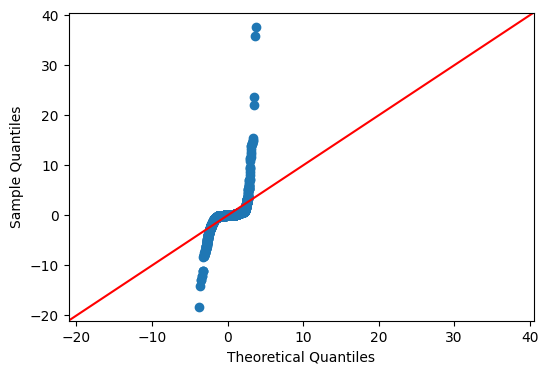

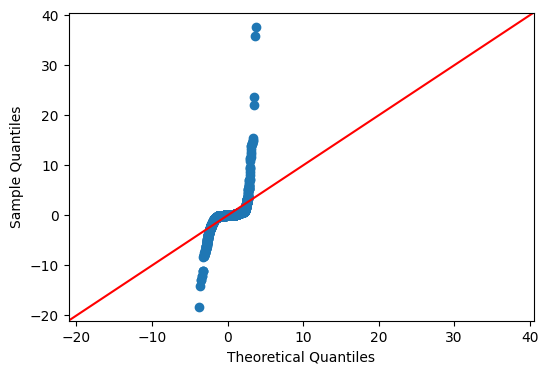

In [46]:
## Create a Q-QPlot
resid = y_test - y_predic_test
# first calculate residuals 


## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6, 4))
sm.graphics.qqplot(resid, line='45', fit=True, ax=ax)

### Residual Plot for Checking Homoscedasticity

In [42]:
## Plot scatterplot with y_hat_test vs resids


### Putting it all together

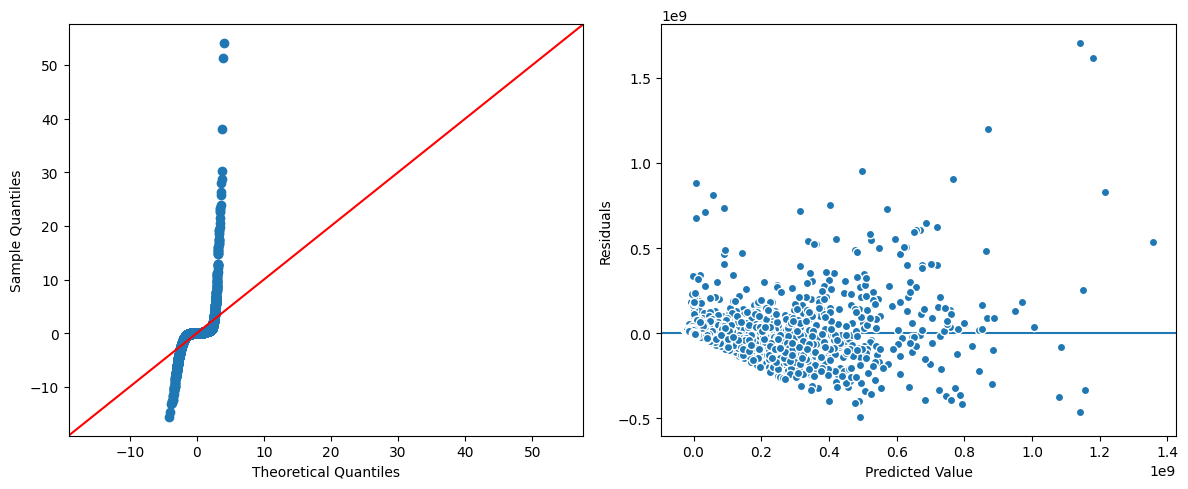

In [52]:
def evaluate_ols(result,X_train_tf, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_tf)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_tf, y_train)



> Next class: iterating on our model & interpreting coefficients